In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import copy

In [2]:
def get_rows_where_eq(df, name, value):
    filtered = df[name] == value
    df = df[filtered]
    return df

In [11]:
dataset = pd.read_csv("./employee_strengths_train.csv")
dataset = dataset[['Name ', 'Talent Segment', 'Role Family', 'Role', 'Tech Specialty', 'Strength 1', 'Strength 2', 'Strength 3', 'Strength 4', 'Strength 5', 'Strength 6', 'Strength 7', 'Strength 8', 'Strength 9', 'Strength 10']]
talent_segments = set(dataset['Talent Segment'].tolist())
role_families = set(dataset['Role Family'].tolist())
roles = set(dataset['Role'].tolist())
tech_specialties = set(dataset['Tech Specialty'].tolist())
strengths = set(dataset['Strength 1'].tolist())

In [12]:
empty_strength_counts = {}
correlations = {}

for s in strengths:
    empty_strength_counts[s] = 0


for ts in list(talent_segments):
    
    strength_counts = copy.deepcopy(empty_strength_counts)
    df = get_rows_where_eq(dataset, 'Talent Segment', ts)
    print(ts)
    print(len(df))
    
    for sl in range(1, 11):
        strengths_in_category = df[f'Strength {sl}'].tolist()

        for s in strength_counts.keys():
            strength_counts[s] += strengths_in_category.count(s)
            
#     for s in strengths_in_category:
#         print(f"{ts}: {s}: {strength_counts[ts][s]}")
    
    correlations[ts] = strength_counts
        

Business Advisory
13
Management Consulting
220
Business Process Specialization
5
Performance, Risk & Quality
3
Cloud
55
Business & Technology Integration
514
Infrastructure
41
Strategy
38
Research
1
Software Engineering
539
Sales
36
Human Resources
30
Portfolio & Delivery Management
7
Industry Solutions & Services
15
Account Leadership
24
Workplace Management & Solutions
30
Sales Enablement
5
IT Operations
22
Marketing & Communications
12
Legal & Commercial Services
27
Product, Service & Offering Development
1
Solution Architecture
10
Program, Project & Service Mgmt
97
Design
26
Technology Architecture
89
Finance
39
Analytics
26
Organization & Practice Leadership
10
Business Process Delivery
8
Security
57


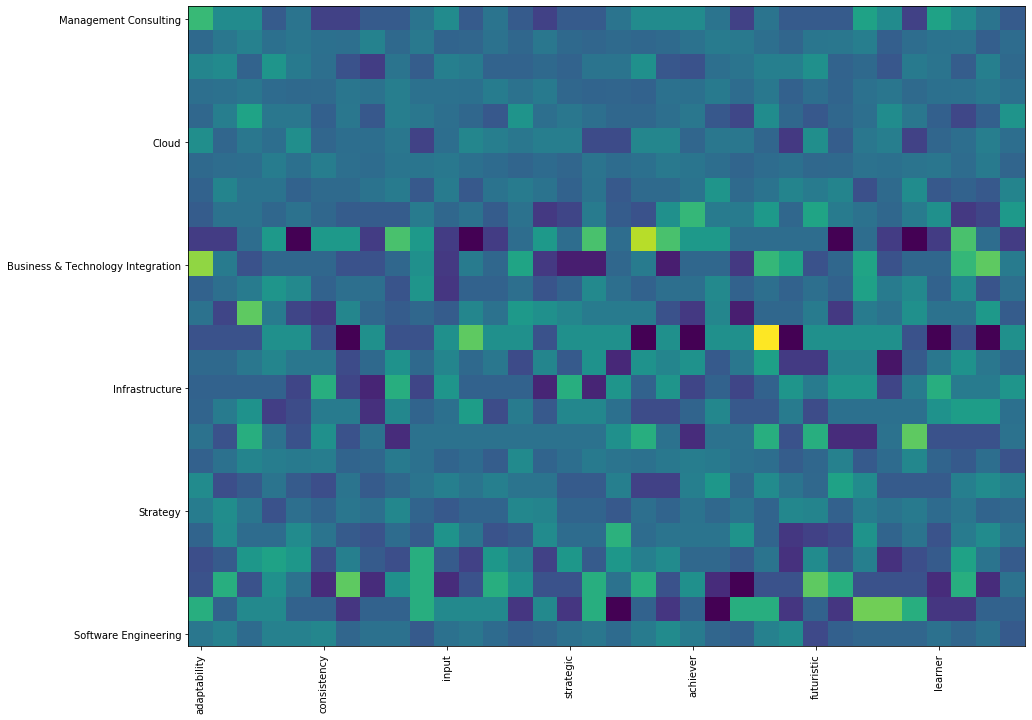

In [17]:
talent_segments.discard('Research')
talent_segments.discard('Product, Service & Offering Development')
talent_segments.discard('Performance, Risk & Quality')
talent_segments.discard('Business Process Specialization')

num_talent_segments = len(talent_segments)
num_strengths = len(strengths)

counts = np.zeros([num_talent_segments, num_strengths])




for i, ts in enumerate(list(talent_segments)):    
    for j, strn in enumerate(list(strengths)):
        counts[i, j] = correlations[ts][strn]
        
counts = counts.astype(np.float32)
for i in range(counts.shape[0]):
    sum = counts[i, :].sum()
    counts[i, :] = counts[i, :]/sum
        
        
fig = plt.figure(figsize=[15, 15])
ax = fig.add_subplot(111)
ax.imshow(counts)
ax.set_xticklabels(strengths, rotation=90)
# ax.xaxis.set_major_locator(ticker.MultipleLocator(1))

ax.set_yticklabels(talent_segments)
# ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()


